In [1]:
import stanza
import urduhack

import pandas as pd
import re
import numpy as np
from urduhack import normalize
from urduhack.preprocessing import normalize_whitespace
from urduhack.preprocessing import remove_punctuation
from urduhack.preprocessing import replace_urls
from urduhack.preprocessing import replace_emails
from urduhack.preprocessing import replace_numbers
from urduhack.preprocessing import remove_english_alphabets

from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances


from bs4 import BeautifulSoup
from scipy.stats import multivariate_normal as mvn

import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import string

In [3]:
df = pd.read_csv('tweets.csv',encoding='utf-8',error_bad_lines=False)

In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

# Pre-Processing

In [5]:
nlp = stanza.Pipeline(lang='ur', processors='tokenize,lemma')

2022-04-22 00:28:26 INFO: Loading these models for language: ur (Urdu):
| Processor | Package |
-----------------------
| tokenize  | udtb    |
| lemma     | udtb    |

2022-04-22 00:28:26 INFO: Use device: cpu
2022-04-22 00:28:26 INFO: Loading: tokenize
2022-04-22 00:28:26 INFO: Loading: lemma
2022-04-22 00:28:26 INFO: Done loading processors!


In [6]:
# urdu_swords = "ایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیںاب ابھی اپنا اپنے اپنی اٹھا اس اسے اسی اگر ان انہوں انہی انہیں انھیں او اور اے ایسا ایسے ایسی ایک آ آپ آتا آتے آتی آگے آنا آنے آنی آئے آئی آئیں آیا با بڑا بڑے بڑی بعد بعض بلکہ بہت بھی بے پاس پر پہلے پھر تا تاکہ تب تجھ تجھے تک تم تمام تمہارا تمہارے تمھارے تمہاری تمہیں تمھیں تھا تھے تھی تھیں تو تیری تیرے جا جاتا جاتی جاتے جاتی جانے جانی جاؤ جائے جائیں جب جس جن جنہوں جنہیں جو جیسا جیسے جیسی جیسوں چاہیئے چلا چاہے چونکہ حالاں حالانکہ دو دونوں دوں دے دی دیا دیں دیے دیتا دیتے دیتی دینا دینے دینی دیئے ڈالا ڈالنا ڈالنے ڈالنی ڈالے ڈالی ذرا رکھا رکھتا رکھتے رکھتی رکھنا رکھنے رکھنی رکھے رکھی رہ رہا رہتا رہتے رہتی رہنا رہنے رہنی رہو رہے رہی رہیں زیادہ سا سامنے سب سکتا سو سے سی شاید صرف طرح طرف عین کا کبھی کچھ کہہ کر کرتا کرتے کرتی کرنا کرنے کرو کروں کرے کریں کس کسے کسی کہ کہا کہے کو کون کوئی کے کی کیا کیسے کیوں کیونکہ کیے کئے گا گویا گے گی گیا گئے گئی لا لاتا لاتے لاتی لانا لانے لانی لایا لائے لائی لگا لگے لگی لگیں لو لے لی لیا لیتا لیتے لیتی لیکن لیں لیے لئے مجھ مجھے مگر میرا میرے میری میں نا نہ نہایت نہیں نے ہاں ہر ہم ہمارا ہمارے ہماری ہو ہوا ہوتا ہوتے ہوتی ہوتیں ہوں ہونا ہونگے ہونے ہونی ہوئے ہوئی ہوئیں ہے ہی ہیں و والا والوں والے والی وہ وہاں وہی وہیں یا یعنی یہ یہاں یہی یہیں"
# stop_words = ""
# doc = nlp(urdu_swords)
# a = doc.to_dict()
# a=a[0]
# for i in a:
#     stop_words=stop_words+(i['lemma'])+" "
    
# #print(stop_words)

# stop_words = stop_words.split()
# stop_words = " ".join(sorted(set(stop_words), key=stop_words.index))


In [7]:
stop_word = 'ایت نہیں نے ہاں ہر ہم مےں ہو ہے ہی و والا وہ وہاں وہی وہیں یا یعنی یہ یہاں یہیںاب ابھی اپنا اٹھ اگر او اور اے ایسا ایک آ آپ آگے آنی آئی با بڑا بڑی بعد بعض بلکہ بہت بھی بے پاس پر پہلے پھر تا تاکہ تب تجھ تو تک تمام تمہارا تمھارا تم تمھ تھا تیری تیرا جا جاؤ جب جو جیسا جیسے جیسی جیس چاہیئے چل چاہ چونکہ حالاں حالانکہ دو دوں دے دینی ڈال ڈالنا ڈالنی ذرا رکھ رکھنی رہ رہنی زیادہ سا سامنے سب سک سو سے سی شاید صرف طرح طرف عین کا کبھی کچھ کہہ کر کون کوا کوئی کہ کہا کو کیسا کیوں کیونکہ گا گویا گے گی لا لاتا لاتی لانی لائے لگ لو لے لیکن لیے لئے مجھ مگر میرا میرے میں نا نہ نہایت یہیں'
stop_word = stop_word.split()

In [8]:
def preprocess(word):
    word = re.sub("\W", " ",word)
    word = re.sub("[a-zA-Z0-9]","",word)
    word = normalize_whitespace(word)
    word = remove_punctuation(word)
    word = replace_urls(word)
    word = replace_emails(word)
    #word = normalize(word)
    word = replace_numbers(word)
    #STanza lemmentization normalize
    
    doc = nlp(word)
    a = doc.to_dict()
    if(len(a) != 0):
        a = a[0]
        word = ''
        for i in a:
            if not i['lemma'] in stop_word:
                if(i['id']==(a[-1]['id'])):
                    word=word+i['lemma']
                else:
                    word = word+i['lemma']+' '
    
    return word

In [9]:
def remove_duplicate_words(string):
        x = string.split()
        x = sorted(set(x), key = x.index)
        return ' '.join(x)

In [10]:
df[1:100]

,Unnamed: 0,tweets,timestamp
1,1,"RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, ...",2022-04-10 20:09:56
2,2,RT @FaisalJavedKhan: آپکی رائے میں کیا تحریک ا...,2022-04-10 20:09:57
3,3,RT @Abdulla78487680: جس سے جگر لالہ میں ٹھنڈک ...,2022-04-10 20:09:57
4,4,RT @fawadchaudhry: شہباز شریف کے کاغذات نامزدگ...,2022-04-10 20:09:57
5,5,RT @Sarfraz053: @MaddyWithKhan عمران خان نے کہ...,2022-04-10 20:09:57
...,...,...,...
95,95,اب شاہین کا تجربہ کرو یا مسرت شاہین کا\r\nاگلے...,2022-04-10 20:10:03
96,96,RT @MishalBukhari5: شریک جرم ہی ہو گا جو اب رہ...,2022-04-10 20:10:03
97,97,RT @ImranRiazKhan: ان سب کی مرمت ہو رہی ہے,2022-04-10 20:10:03
98,98,RT @SMGhouri2: @SSEHBAI1 ایک بات تو طے ہے کہ ل...,2022-04-10 20:10:03


In [11]:
list1 = []
for i in range(len(df.index)):
    sent = df[df.columns[1]][i]
    list1.append(sent)
    

In [12]:
sent_p =[]
for tweet in list1:
    sent_p.append(preprocess(tweet))

# Timestamp

In [13]:
df2 = pd.DataFrame(sent_p,columns = ["tweets"])

In [14]:
df2['timestamp'] = pd.to_datetime(df['timestamp'], format='%a %b %d %H:%M:%S +0000 %Y')

In [15]:
def timefilter(start,end,dft):
    filteredTw = []
    filteredTm = []
    for i in range(0,len(dft)):
        if (dft['timestamp'][i] >= start) & (dft['timestamp'][i] <= end):
            filteredTw.append(dft['tweets'][i])
            filteredTm.append(dft['timestamp'][i])
    filtered = pd.DataFrame()
    if(filteredTm and filteredTw is not None):
        filtered['tweets'] = pd.DataFrame(filteredTw)
        filtered['timestamp'] = pd.DataFrame(filteredTm)
    else:
        print("No values found, returning default")
        return dft
    
#     filtered = dft[(dft['timestamp'] >= start) & (dft['timestamp'] <= end)]
    return filtered

In [16]:
splitdf2 = timefilter(pd.Timestamp(2022,4,10,20,9,5),pd.Timestamp(2022,4,10,20,9,59),df2)
splitdf = timefilter(pd.Timestamp(2022,4,10,20,9,5),pd.Timestamp(2022,4,10,20,9,59),df)


In [17]:
splitdf

,tweets,timestamp
0,@SaeedGhani1 چاچا\r\nستو پی لیا ہو تو دیکھو\r\...,2022-04-10 20:09:56
1,"RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, ...",2022-04-10 20:09:56
2,RT @FaisalJavedKhan: آپکی رائے میں کیا تحریک ا...,2022-04-10 20:09:57
3,RT @Abdulla78487680: جس سے جگر لالہ میں ٹھنڈک ...,2022-04-10 20:09:57
4,RT @fawadchaudhry: شہباز شریف کے کاغذات نامزدگ...,2022-04-10 20:09:57
5,RT @Sarfraz053: @MaddyWithKhan عمران خان نے کہ...,2022-04-10 20:09:57
6,پہلے والے غیر جمہوری اور غیر آئینی طریقے سے نک...,2022-04-10 20:09:57
7,RT @ImranRiazFan_: پاکستان کی تاریخ میں پہلی د...,2022-04-10 20:09:57
8,RT @haroon_natamam: راولپنڈی میں لوگ سڑکوں پہ ...,2022-04-10 20:09:57
9,"RT @SSEHBAI1: لوگ باہر: جیسے لوگ نکل رہے ہیں, ...",2022-04-10 20:09:57


# TF-IDF

In [18]:
from sklearn.cluster import KMeans  
data = splitdf2
tf_idf_vectorizor = TfidfVectorizer(max_features = 5000)
tf_idf = tf_idf_vectorizor.fit_transform(splitdf2['tweets'][:])
tf_idf_norm = normalize(tf_idf)

tf_idf_array = tf_idf_norm.toarray()
a = pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

# Kneed-Point

In [19]:
df.dtypes

Unnamed: 0             int64
tweets                object
timestamp     datetime64[ns]
dtype: object

# Clustering with Time-stamp

In [20]:
k = 3
model = KMeans(n_clusters=k)

labels = model.fit(tf_idf_array)

In [21]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tf_idf_vectorizor.get_feature_names()
for i in range(k):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])

Top terms per cluster:
Cluster 0:
 ھکاری
 پاکستانی
 باپ
 اللہ
 عمران
 آج
 اب
 پاکستان
 تیز
 باجوہ
Cluster 1:
 دیکھ
 راستہ
 میڈیا
 مارکیٹ
 دنگ
 پسندیدہ
 ہوٹل
 سوشل
 بند
 سینڈوچ
Cluster 2:
 باہر
 لوگ
 نکل
 جلسا
 لیڈر
 بغیر
 باہرایگا
 خود
 حال
 شر


In [22]:
sklearn_pca = PCA(n_components = 3)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
predicted_values = model.predict(tf_idf_array)

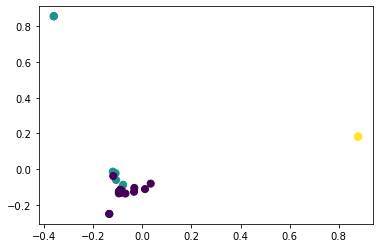

In [23]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=predicted_values, s=50, cmap='viridis')

In [24]:
clusters = []
for i in range(k):
    clusters.append([])

for i,row in splitdf.iterrows():
    clusters[predicted_values[i]].append(row['tweets'])

In [114]:
for i in range(len(clusters)):
    print("Cluster: " + str(i))
    for j in range(min(len(clusters[i]),5)):
        print(clusters[i][j]+'\n')

Cluster: 0
RT @FaisalJavedKhan: آپکی رائے میں کیا تحریک انصاف کو اسمبلی سے مستعفیٰ ہو جانا چاہیے یا نہیں ؟

RT @Abdulla78487680: جس سے جگر لالہ میں ٹھنڈک ہو وہ شبنم

دریاؤں کے دل جس سے دہل جائیں وہ طوفان،

ہر لحظہ ہے مومن.

#امپورٹڈ_گورمنٹ_نامنظور…

RT @fawadchaudhry: شہباز شریف کے کاغذات نامزدگی منظور ہونے کے بعد ایف آئ اے سے پہلا آرڈر یہ ہوا ہے کہ کل وکلاء کی ٹیم شہباز شریف کے مقدمے م…

RT @Sarfraz053: @MaddyWithKhan عمران خان نے کہا تھا، میرا ووٹر ابھی چھوٹا ہے ۔ لیکن جب وہ 18 سال کا ہوگا تو سارے ووٹس میرے ہوں گے ۔ آج وہ و…

پہلے والے غیر جمہوری اور غیر آئینی طریقے سے نکالے گئے ۔ اس کو جمہوری ائینی طریقے سے نکالا گیا ۔ 
یہ تو اب پتہ چلے گا کہ کون چور ھے

Cluster: 1
@SaeedGhani1 چاچا
ستو پی لیا ہو تو دیکھو
پاکستان میں عوام کیسے نکلی یے

RT @HHsirHKBaloch: میڈیا بلیک آوٹ کروا کر کیا اکھاڑ لیا ؟؟ الٹا مزید بے نقاب ہو گئے
آج کی جنریشن معلومات کیلئے آپکے "جیونیوز" کی محتاج نہیں…

RT @Muhamma15007911: پولیس رینجرز سے گزارش ہے کہ جیسے بھی ممکن ہو وہ راستے کھلوائیں ان یوتھیوں سے بچوں نے سکو

# TAG Clound

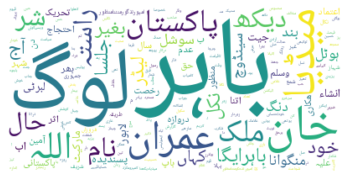

In [188]:
from wordcloud import WordCloud
from bidi.algorithm import get_display
from arabic_reshaper import ArabicReshaper

configuration = {
    "language": "Urdu"
}
reshaper = ArabicReshaper(configuration=configuration)

text = reshaper.reshape(tweets_text)
text = get_display(text)

word_cloud = WordCloud(collocations = False, background_color = 'white', font_path='NotoNaskhArabic-Regular.ttf').generate(text)
plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")


# Elbow Curve & Knee Point Detection

C:\Users\mhsin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


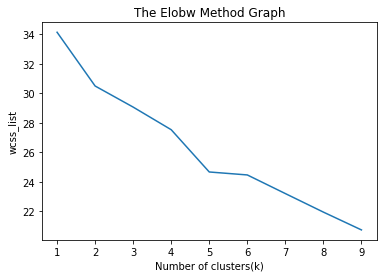

In [30]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans
import matplotlib.pyplot as mtp    

wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 10):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(tf_idf_array)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 10), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  


In [116]:
import kneed
from kneed import DataGenerator, KneeLocator

x = []
for num in range(9):
    x.append(num)

y = wcss_list

kneedle = KneeLocator(x, y, S=1.0, curve="concave", direction="increasing")
print(round(kneedle.knee,3))

0


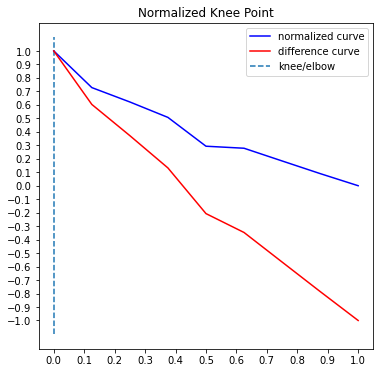

In [117]:
kneedle.plot_knee_normalized()


# Silhouette Score

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def silhouetteScore(tf_idf, k):
    range_n_clusters = range(2,k)
    silhouette_avg = []
    for i in range_n_clusters:
        kmeans = KMeans(n_clusters=i, random_state= 42)  
        kmeans.fit(tf_idf)  
        score = silhouette_score(tf_idf, kmeans.labels_, metric='euclidean')
        silhouette_avg.append(score)
        #print(i,'Silhouetter Score: %.3f' % score)    
    silhouette_avg
    plt.plot(range_n_clusters,silhouette_avg,'bx-')
    plt.xlabel('Values of K') 
    plt.ylabel('Silhouette score') 
    plt.title('Silhouette analysis For Optimal k')
    plt.show()
    
    return silhouette_avg
scores = silhouetteScore(tf_idf_array,15)

# Big Corpus Clustering

In [155]:
bigcorpusdf = pd.read_csv("BigCorpus.txt", sep="\n", header=None)

In [184]:
news_text = " \n".join(news for news in bigcorpusdf[0])
preprocessed_news = preprocess(news_text)

In [185]:
data = bigcorpusdf
tf_idf_vectorizor2 = TfidfVectorizer(max_features = 5000)
tf_idf2 = tf_idf_vectorizor2.fit_transform(bigcorpusdf[0][:])
tf_idf_norm2 = normalize(tf_idf2)

tf_idf_array2 = tf_idf_norm2.toarray()
a = pd.DataFrame(tf_idf_array2, columns=tf_idf_vectorizor2.get_feature_names())

In [186]:
a

,10,100,11,12,13,14,15,150,16,17,...,یوٹیلٹی,یوٹیلیٹی,یوں,یک,یکجہتی,یکساں,یکم,یہ,یہاں,یہی
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.146369,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.145175,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.209435,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6835,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6836,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
6837,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.128006,0.000000,0.0
6838,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


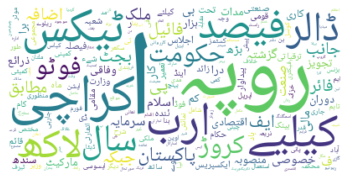

In [187]:

configuration = {
    "language": "Urdu"
}
reshaper = ArabicReshaper(configuration=configuration)

text = reshaper.reshape(news2)
text = get_display(text)

word_cloud = WordCloud(collocations = False, background_color = 'white', font_path='NotoNaskhArabic-Regular.ttf').generate(text)
plt.axis("off")
plt.imshow(word_cloud, interpolation="bilinear")


## Clustering

In [ ]:
scores2 = silhouetteScore(tf_idf_array2,15)